In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

Los dataset eran demasiado grandes para ser usados en su totalidad, sin embargo, un primer filtro se puede hacer con facilidad, por provincias que rodean al volcan cotopaxi. 

In [16]:
import sqlite3

conn = sqlite3.connect('Cantones.db')

provincias_cercanas = [
    18, 6, 5, 13, 12, 17, 23
]

#Load the entire dataset
df = pd.read_csv(
    '/Users/dicordova/Proyecto-FDS/data/vivienda_cant.csv', sep=';'
)

# #Filter the dataset to only include the provinces of interest
df = df[df['I01'].isin(provincias_cercanas)]

#Display basic information
print(df.info())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 3027564 entries, 614520 to 6466399
Data columns (total 32 columns):
 #   Column    Dtype  
---  ------    -----  
 0   I01       int64  
 1   I02       int64  
 2   I10       float64
 3   D01       int64  
 4   V01       int64  
 5   V0201     float64
 6   V0202     float64
 7   V03       float64
 8   V04       float64
 9   V05       float64
 10  V06       float64
 11  V07       float64
 12  V08       float64
 13  V09       float64
 14  V10       float64
 15  V11       float64
 16  V12       float64
 17  V13       float64
 18  V14       float64
 19  V15       float64
 20  V16       float64
 21  V17       float64
 22  AUR       int64  
 23  CANTON    int64  
 24  ID_VIV    float64
 25  TOTFALL   int64  
 26  TOTEMI    int64  
 27  TOTPER    int64  
 28  V0201R    float64
 29  V15R      float64
 30  DEF_HAB   float64
 31  IMP_VOPA  int64  
dtypes: float64(22), int64(10)
memory usage: 762.2 MB
None
                I01           I02           I1

Podemos ver que los datos tienen:
1. Valores NAN
2. Columnas con "headers" con nomenclatura
3. Variables categóricas, con texto, numéricas


In [17]:
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

float64    22
int64      10
Name: count, dtype: int64


In [18]:
#We count nulls per column
missing_values_df = df.isnull().sum().sort_values(ascending=False)
print(missing_values_df)

# #Get a visual of the missing values, for better understanding. 
# %pip install missingno
# import missingno as msno
# msno.matrix(df)
# msno.heatmap(df)


V0202       3022313
V12          696650
V07          696650
V17          696650
V16          696650
V15          696650
V14          696650
V13          696650
V11          696650
V10          696650
V09          696650
V08          696650
V06          696650
V05          696650
V04          696650
V03          696650
V15R         696650
DEF_HAB      696650
V0201          5667
V0201R         5667
ID_VIV            0
TOTPER            0
TOTEMI            0
TOTFALL           0
I01               0
CANTON            0
AUR               0
I02               0
V01               0
D01               0
I10               0
IMP_VOPA          0
dtype: int64


In [19]:
integers = df.select_dtypes(include=['int'])
print(integers.head())

# I want to know the names of my columns
column_names = df.columns
print(column_names)

        I01  I02  D01  V01  AUR  CANTON  TOTFALL  TOTEMI  TOTPER  IMP_VOPA
614520    5    1    1    4    2     501        0       0       3         2
614521    5    1    3    1    2     501        0       0       5         2
614522    5    1    4    1    1     501        0       0       2         2
614523    5    1    7    1    2     501        0       0       4         2
614524    5    1    6    1    2     501        0       0       1         2
Index(['I01', 'I02', 'I10', 'D01', 'V01', 'V0201', 'V0202', 'V03', 'V04',
       'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'AUR', 'CANTON', 'ID_VIV', 'TOTFALL', 'TOTEMI',
       'TOTPER', 'V0201R', 'V15R', 'DEF_HAB', 'IMP_VOPA'],
      dtype='object')


Podemos ver que 10 variables son integers, seguramente variables categoricas que fueron codificadas de esa manera. Ademas, vemos que muchas de las columnas tienen nombres codificados. Vamos a empezar a cambiar eso, aunque este sería un paso para feature engineering durante el DATA WRANGLING, este cambio inicial nos va a ayudar a entender la data mejor. 


In [20]:
#We rename the variables to make them more understandable
column_renaming = {
    "I01": "provincia",
    "I02": "canton_id",
    "I10": "nro_vivienda",
    "D01": "tipo_via",
    "V01": "tipo_vivienda",
    "V0201": "ocup_viv_part",
    "V0202": "ocup_viv_colect",
    "V03": "mat_techo",
    "V04": "estado_techo",
    "V05": "mat_paredes",
    "V06": "estado_paredes",
    "V07": "mat_piso",
    "V08": "estado_piso",
    "V09": "tipo_agua",
    "V10": "fuente_agua",
    "V11": "tipo_sanitario",
    "V12": "electricidad_red",
    "V13": "otra_fuente_elec",
    "V14": "eliminacion_basura",
    "V15": "nro_cuartos",
    "V16": "gasto_compartido",
    "V17": "nro_hogares",
    "AUR": "zona",
    "CANTON": "canton",
    "ID_VIV": "id_vivienda",
    "TOTFALL": "total_fallecidos",
    "TOTEMI": "total_emigrantes",
    "TOTPER": "total_personas",
    "V0201R": "ocup_viv_part_r",
    "V15R": "nro_cuartos_r",
    "DEF_HAB": "deficit_habitacional",
    "IMP_VOPA": "registro_imputado_vivienda"
}

df_renamed = df.rename(columns=column_renaming)

In [21]:
#I want to know how many nulls are in each column
null_counts = df_renamed.isnull().sum()
print(null_counts)
print(df_renamed.info())

provincia                           0
canton_id                           0
nro_vivienda                        0
tipo_via                            0
tipo_vivienda                       0
ocup_viv_part                    5667
ocup_viv_colect               3022313
mat_techo                      696650
estado_techo                   696650
mat_paredes                    696650
estado_paredes                 696650
mat_piso                       696650
estado_piso                    696650
tipo_agua                      696650
fuente_agua                    696650
tipo_sanitario                 696650
electricidad_red               696650
otra_fuente_elec               696650
eliminacion_basura             696650
nro_cuartos                    696650
gasto_compartido               696650
nro_hogares                    696650
zona                                0
canton                              0
id_vivienda                         0
total_fallecidos                    0
total_emigra

In [22]:
df_renamed['tipo_vivienda'].value_counts(dropna=False)

tipo_vivienda
1     1703019
2      833363
4      201916
5      156888
3       97994
6       20814
7        4277
8        3626
9        2136
18       1396
13        718
17        446
19        416
15        144
12        140
10        124
14         84
16         39
11         24
Name: count, dtype: int64

In [23]:
df_renamed['ocup_viv_part'].value_counts(dropna=False)

ocup_viv_part
1.0    2215654
4.0     357920
3.0     262916
2.0     115260
5.0      70147
NaN       5667
Name: count, dtype: int64

In [24]:
df_renamed['ocup_viv_colect'].value_counts(dropna=False)

ocup_viv_colect
NaN    3022313
2.0       3941
1.0       1310
Name: count, dtype: int64

In [25]:
#We see the amount of nulls in the column 'ocup_viv_colect'
df_renamed['ocup_viv_colect'].isnull().sum()
df_renamed['ocup_viv_colect'].value_counts(dropna=False)

ocup_viv_colect
NaN    3022313
2.0       3941
1.0       1310
Name: count, dtype: int64

In [26]:
df_renamed['ocup_viv_part'].value_counts(dropna=False)

ocup_viv_part
1.0    2215654
4.0     357920
3.0     262916
2.0     115260
5.0      70147
NaN       5667
Name: count, dtype: int64

In [27]:
tipos_material_vivienda = [
    'mat_techo', 'estado_techo', 'mat_paredes', 'estado_paredes',
    'mat_piso', 'estado_piso'
]

acceso_agua_vivienda = [
    'tipo_agua', 'fuente_agua',
    'tipo_sanitario'
]

acceso_electricidad_vivienda = [
    'electricidad_red', 'otra_fuente_elec',
]

otros_indicadores_vivienda = [
    'eliminacion_basura', 'nro_cuartos', 'gasto_compartido', 'nro_hogares'
]

for tipos in tipos_material_vivienda:
    print(f'\n---{tipos}---')
    print(df_renamed[tipos].value_counts(dropna=False))


---mat_techo---
mat_techo
1.0    1139826
3.0     863048
NaN     696650
2.0     213899
4.0     105062
5.0       5171
6.0       3908
Name: count, dtype: int64

---estado_techo---
estado_techo
1.0    1209533
2.0     873014
NaN     696650
3.0     248367
Name: count, dtype: int64

---mat_paredes---
mat_paredes
2.0    1764681
NaN     696650
1.0     316604
7.0      95189
5.0      83189
4.0      37606
6.0      19658
3.0       9446
8.0       4541
Name: count, dtype: int64

---estado_paredes---
estado_paredes
1.0    1182628
2.0     932919
NaN     696650
3.0     215367
Name: count, dtype: int64

---mat_piso---
mat_piso
2.0    955849
4.0    764749
NaN    696650
1.0    305996
5.0    193308
7.0     80530
6.0     14595
3.0     10422
8.0      5465
Name: count, dtype: int64

---estado_piso---
estado_piso
1.0    1229027
2.0     872060
NaN     696650
3.0     229827
Name: count, dtype: int64



---tipo_agua---
tipo_agua
1.0    1752609
NaN     696650
2.0     306721
4.0     220500
3.0      51084
Name: count, dtype: int64


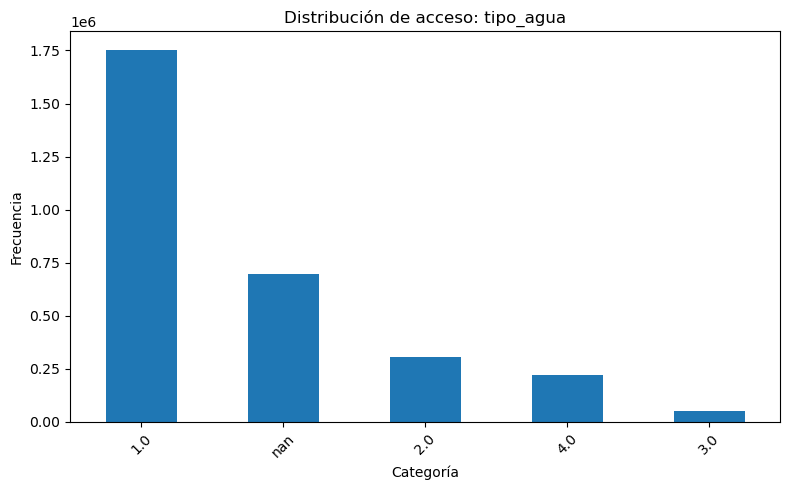


---fuente_agua---
fuente_agua
1.0    1640570
NaN     696650
2.0     319382
3.0     218271
5.0      89604
4.0      63087
Name: count, dtype: int64


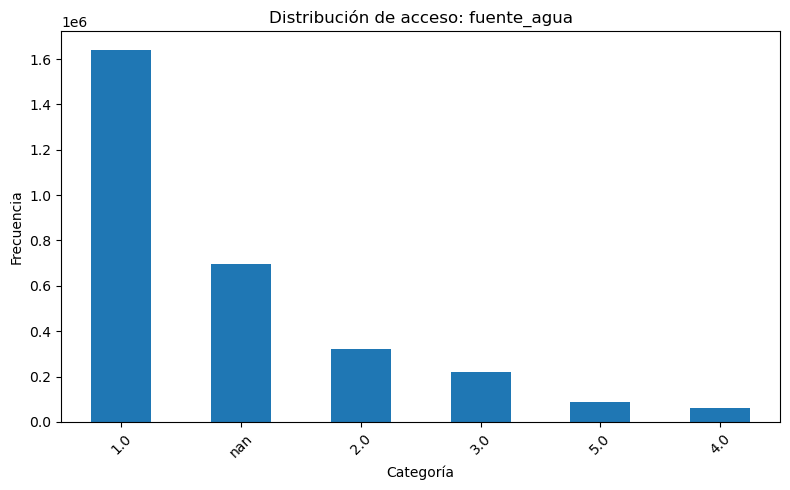


---tipo_sanitario---
tipo_sanitario
1.0    1586653
NaN     696650
2.0     523096
4.0     114759
7.0      56336
6.0      30216
5.0      15808
3.0       4046
Name: count, dtype: int64


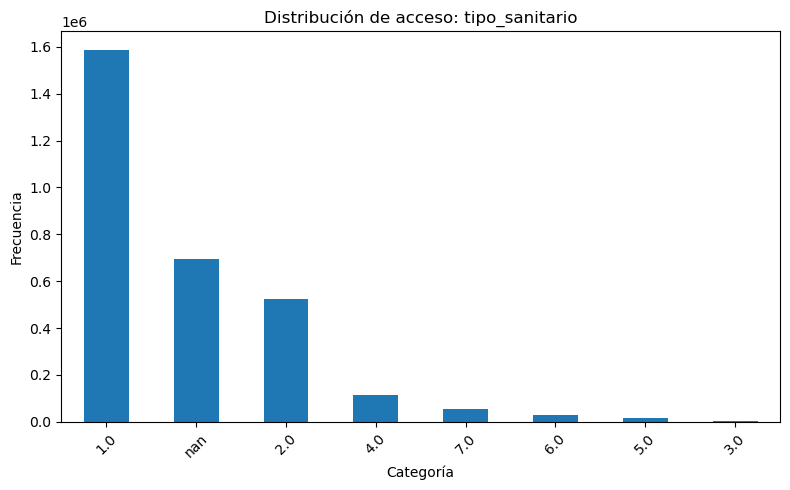

In [28]:
import matplotlib.pyplot as plt

for acceso in acceso_agua_vivienda:
    print(f'\n---{acceso}---')
    counts = df_renamed[acceso].value_counts(dropna=False)
    print(counts)
    
    # Plotting
    plt.figure(figsize=(8, 5))
    counts.plot(kind='bar')
    plt.title(f'Distribución de acceso: {acceso}')
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [29]:
for acceso in acceso_agua_vivienda:
    print(f'\n---{acceso}---')
    print(df_renamed[acceso].value_counts(dropna=False))


---tipo_agua---
tipo_agua
1.0    1752609
NaN     696650
2.0     306721
4.0     220500
3.0      51084
Name: count, dtype: int64

---fuente_agua---
fuente_agua
1.0    1640570
NaN     696650
2.0     319382
3.0     218271
5.0      89604
4.0      63087
Name: count, dtype: int64

---tipo_sanitario---
tipo_sanitario
1.0    1586653
NaN     696650
2.0     523096
4.0     114759
7.0      56336
6.0      30216
5.0      15808
3.0       4046
Name: count, dtype: int64


In [30]:
for acceso in acceso_electricidad_vivienda:
    print(f'\n---{acceso}---')
    print(df_renamed[acceso].value_counts(dropna=False))


---electricidad_red---
electricidad_red
1.0    2286413
NaN     696650
2.0      44501
Name: count, dtype: int64

---otra_fuente_elec---
otra_fuente_elec
5.0    2231498
NaN     696650
1.0      93485
2.0       4664
4.0       1113
3.0        154
Name: count, dtype: int64


In [31]:
for otros in otros_indicadores_vivienda:
    print(f'\n---{otros}---')
    print(df_renamed[otros].value_counts(dropna=False))


---eliminacion_basura---
eliminacion_basura
1.0    1617687
NaN     696650
2.0     440206
4.0     236446
5.0      12407
3.0      10265
7.0      10186
6.0       3717
Name: count, dtype: int64

---nro_cuartos---
nro_cuartos
3.0     708839
NaN     696650
4.0     553965
2.0     443467
1.0     253025
5.0     246210
6.0      79287
7.0      25387
8.0      11883
9.0       4059
10.0      2623
11.0       841
12.0       718
13.0       216
14.0       150
15.0        96
16.0        53
17.0        35
18.0        25
20.0        24
19.0        11
Name: count, dtype: int64

---gasto_compartido---
gasto_compartido
1.0    2288704
NaN     696650
2.0      42210
Name: count, dtype: int64

---nro_hogares---
nro_hogares
1.0    2288704
NaN     696650
2.0      36808
3.0       4619
4.0        638
5.0        111
6.0         28
7.0          4
9.0          2
Name: count, dtype: int64


Esto me dice que: las viviendas que son NAN en ocup_viv_colect son viviendas particulares

PARA VIVIENDAS COLECTIVAS. 

1. Con residentes habituales 
2. Sin residentes habituales 

PARA VIVIENDAS PARTICULARES

1. Ocupada con personas presentes
2. Ocupada con personas ausentes
3. De temporada o vacacional
4. Desocupada
5. En construcción


In [32]:
mat_techo_por_provincia = (df_renamed[df_renamed['mat_techo'].isna()].groupby('provincia').size())
print(mat_techo_por_provincia)

provincia
5      58027
6      81992
12     62326
13    124482
17    265211
18     64210
23     40402
dtype: int64


In [33]:
#We see if the missing values are related to "tipo de vivienda"
mat_techo_na_por_tipo_vivienda = (df_renamed[df_renamed['mat_techo'].isna()].groupby('tipo_vivienda').value_counts(dropna=False))
print(mat_techo_na_por_tipo_vivienda)

tipo_vivienda  provincia  canton_id  nro_vivienda  tipo_via  ocup_viv_part  ocup_viv_colect  mat_techo  estado_techo  mat_paredes  estado_paredes  mat_piso  estado_piso  tipo_agua  fuente_agua  tipo_sanitario  electricidad_red  otra_fuente_elec  eliminacion_basura  nro_cuartos  gasto_compartido  nro_hogares  zona  canton  id_vivienda   total_fallecidos  total_emigrantes  total_personas  ocup_viv_part_r  nro_cuartos_r  deficit_habitacional  registro_imputado_vivienda
1              5          1          35.0          1         3.0            NaN              NaN        NaN           NaN          NaN             NaN       NaN          NaN        NaN          NaN             NaN               NaN               NaN                 NaN          NaN               NaN          2     501     5.010000e+09  0                 0                 0               2.0              NaN            NaN                   2                             1
                                     1311.0        1 

Podemos ver que los NAN están presentes en todos los tipos (casa particular, choza, departamento, etc) lo que quiere decir que los null no se explican por el tipo de vivienda. Seguimos con el análisis. 



In [34]:
#We see the null values by tipo de vivienda
mat_techo_na_por_tipo_vivienda = (df_renamed[df_renamed['mat_techo'].isna()].groupby('tipo_vivienda').size())
print(mat_techo_na_por_tipo_vivienda)

tipo_vivienda
1     330148
2     217417
3      31660
4      75378
5      27529
6       5118
7       2278
8       1455
9       2136
10       124
11        24
12       140
13       718
14        84
15       144
16        39
17       446
18      1396
19       416
dtype: int64


In [35]:
null_by_province = (df_renamed.groupby('provincia')
                    .apply(lambda x: x.isnull().mean()*100)
                    .round(2))
                
print(null_by_province)

           provincia  canton_id  nro_vivienda  tipo_via  tipo_vivienda  \
provincia                                                                
5                0.0        0.0           0.0       0.0            0.0   
6                0.0        0.0           0.0       0.0            0.0   
12               0.0        0.0           0.0       0.0            0.0   
13               0.0        0.0           0.0       0.0            0.0   
17               0.0        0.0           0.0       0.0            0.0   
18               0.0        0.0           0.0       0.0            0.0   
23               0.0        0.0           0.0       0.0            0.0   

           ocup_viv_part  ocup_viv_colect  mat_techo  estado_techo  \
provincia                                                            
5                   0.20            99.81      30.05         30.05   
6                   0.22            99.78      36.14         36.14   
12                  0.14            99.88      18.47 

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_17648/2639685152.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().mean()*100)


In [36]:
# Group by housing type and check null percentages
df_renamed.groupby('ocup_viv_colect').apply(lambda x: x[['mat_techo', 'estado_techo']].isnull().mean())

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_17648/1068681867.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_renamed.groupby('ocup_viv_colect').apply(lambda x: x[['mat_techo', 'estado_techo']].isnull().mean())


,mat_techo,estado_techo
ocup_viv_colect,,
1.0,1.0,1.0
2.0,1.0,1.0


Podemos ver que los valores nulos en cada columna son iguales o menores que el 10% del total de la muestra. 
Podríamos tomar algunos caminos al respecto. 
1. Borrar aquellas que tengan valores nulos en el 5% o menos del total
2. Imputar con KNN
3. Usar el modo, dado que la mayoría son variables categóricas.

Sin embargo, todavía no está claro si las filas vacías se deben a datos que no se ingresaron o a la lógica del censo. Se recomienda no borrar filas hasta no hacer una investigación más avanzada. 

Explorar variables importantes en demografía y vías. 

In [37]:
df_counts = df_renamed.groupby(['provincia', 'tipo_vivienda']).size().reset_index(name='cantidad')

In [40]:
codigo_a_provincia = {
    5: "Pichincha",
    6: "Cotopaxi",
    12: "Pastaza",
    13: "Morona Santiago",
    17: "Napo",
    18: "Orellana",
    23: "Santo Domingo"
}


In [41]:
df_renamed['provincia'] = df_renamed['provincia'].map(codigo_a_provincia)

In [42]:
tipo_vivienda_labels = {
    1.0: "Casa/villa",
    2.0: "Departamento",
    3.0: "Cuarto en inquilinato",
    4.0: "Mediagua",
    5.0: "Rancho",
    6.0: "Covacha",
    7.0: "Choza",
    8.0: "Otra vivienda particular",
    9.0: "Hotel/pensión/hostal",
    10.0: "Cuartel",
    11.0: "Cárcel",
    12.0: "Hospital/clínica",
    13.0: "Institución religiosa",
    14.0: "Centro de acogida (niños/as)",
    15.0: "Asilo de ancianos",
    16.0: "Internado",
    17.0: "Campamento de trabajo",
    18.0: "Otra vivienda colectiva",
    19.0: "Sin vivienda"
}


In [43]:
codigo_a_provincia = {
    5.0: "Pichincha",
    6.0: "Cotopaxi",
    12.0: "Pastaza",
    13.0: "Morona Santiago",
    17.0: "Napo",
    18.0: "Orellana",
    23.0: "Santo Domingo"
}


In [44]:
df_renamed['tipo_vivienda'] = df_renamed['tipo_vivienda'].map(tipo_vivienda_labels)
df_renamed['tipo_vivienda'].info()


<class 'pandas.core.series.Series'>
Index: 3027564 entries, 614520 to 6466399
Series name: tipo_vivienda
Non-Null Count    Dtype 
--------------    ----- 
3027564 non-null  object
dtypes: object(1)
memory usage: 46.2+ MB


In [45]:
# Define "worst" housing types
tipos_vivienda_peor = ['Choza', 'Covacha', 'Rancho', 'Mediagua', 'Sin vivienda']

# Filter only those rows
df_peores = df_renamed[df_renamed['tipo_vivienda'].isin(tipos_vivienda_peor)]

# Count total viviendas per province (for percentage calculation)
totales_por_provincia = df_renamed.groupby('provincia').size().astype(float)

# Pivot with counts of worst types per province
pivot_peores = pd.pivot_table(
    df_peores,
    index='provincia',
    columns='tipo_vivienda',
    aggfunc='size',
    fill_value=0
).astype(float)

# Calculate percentage
pivot_peores_percent = pivot_peores.div(totales_por_provincia, axis=0) * 100


In [46]:
# Reemplazar los códigos del índice con nombres
pivot_peores_percent_renombrado = pivot_peores_percent.rename(index=codigo_a_provincia)


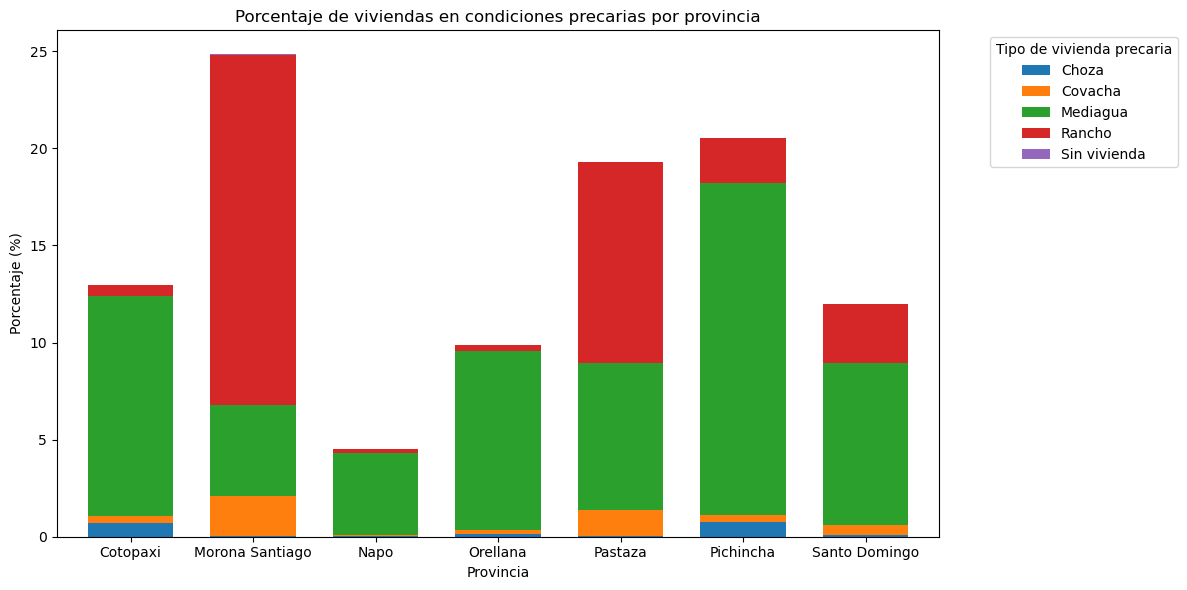

In [47]:
import matplotlib.pyplot as plt

pivot_peores_percent_renombrado.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    width=0.7
)

plt.title('Porcentaje de viviendas en condiciones precarias por provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Tipo de vivienda precaria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [48]:
df_counts = df_renamed.groupby(['provincia', 'tipo_vivienda']).size().reset_index(name='cantidad_via')

In [49]:
df_counts = df_renamed.groupby(['provincia', 'tipo_via']).size().reset_index(name='cantidad_via')

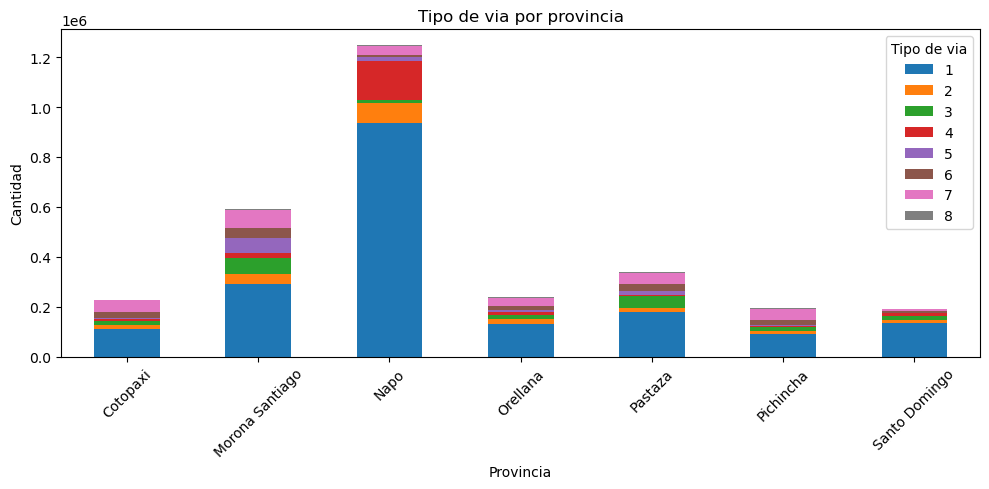

In [50]:
pivot_tipo_via_por_provincia = df_counts.pivot_table(
    index='provincia', 
    columns='tipo_via', 
    values='cantidad_via',
    aggfunc='sum'
).fillna(0)

pivot_tipo_via_por_provincia.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Tipo de via por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.legend(title='Tipo de via')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

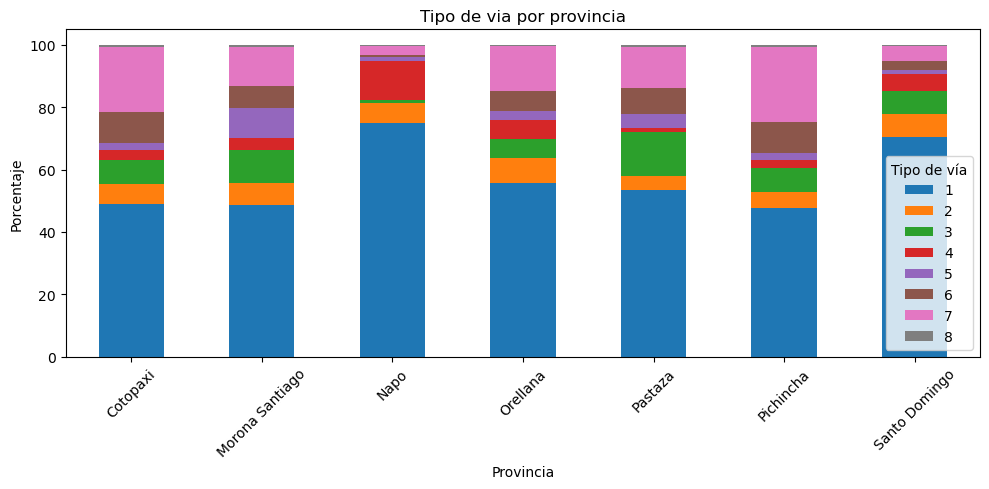

In [51]:
pivot_via_por_provincia_percent = pivot_tipo_via_por_provincia.div(pivot_tipo_via_por_provincia.sum(axis=1), axis=0) * 100

pivot_via_por_provincia_percent.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Tipo de via por provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.legend(title='Tipo de vía')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

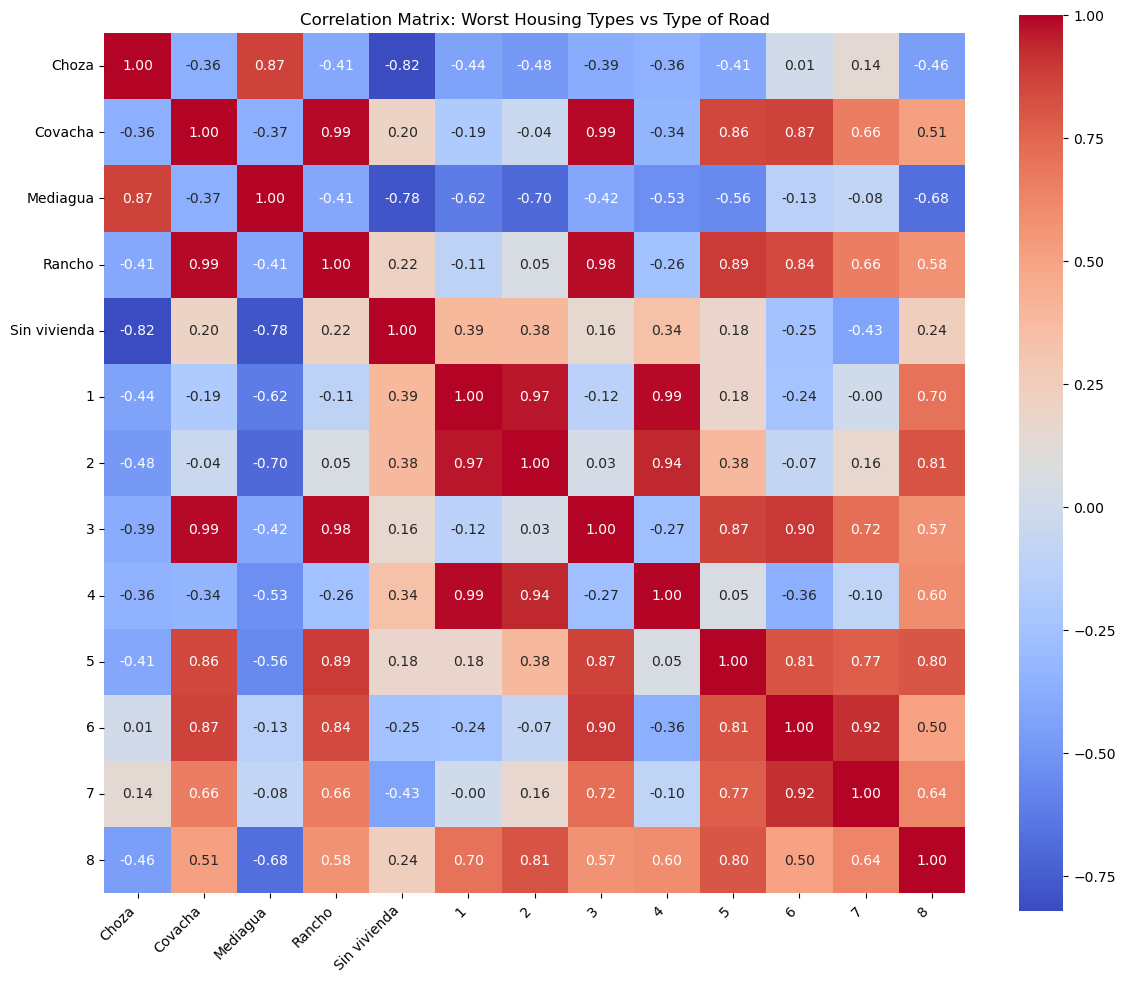

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure both DataFrames are aligned by provincia (index)
combined_df = pd.concat([pivot_peores_percent, pivot_tipo_via_por_provincia], axis=1, join='inner')

# Compute correlation matrix
correlation_matrix = combined_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix: Worst Housing Types vs Type of Road')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


IDENTIFICACIÓN DE CIERTOS INDICADORES DE VULNERABILIDAD

In [243]:
material_techo_labels = {
    1: "Hormigón (losa, cemento)",
    2: "Fibrocemento / asbesto (eternit, eurolit)",
    3: "Zinc / aluminio (lámina o plancha metálica)",
    4: "Teja",
    5: "Palma, paja u hoja",
    6: "Otro material"
}


In [244]:
df_renamed['mat_techo_labels'] = df_renamed['mat_techo'].map(material_techo_labels)

In [248]:
# Map material codes to descriptive labels before grouping
df_renamed['mat_techo_desc'] = df_renamed['mat_techo'].map(material_cubierta_labels)

# Then group by descriptive label
df_counts = df_renamed.groupby(['provincia', 'mat_techo_desc']).size().reset_index(name='cantidad_material_techo')

pivot_techo_por_provincia = df_counts.pivot_table(
    index='provincia', 
    columns='mat_techo_desc', 
    values='cantidad_material_techo',
    aggfunc='sum'
).fillna(0)


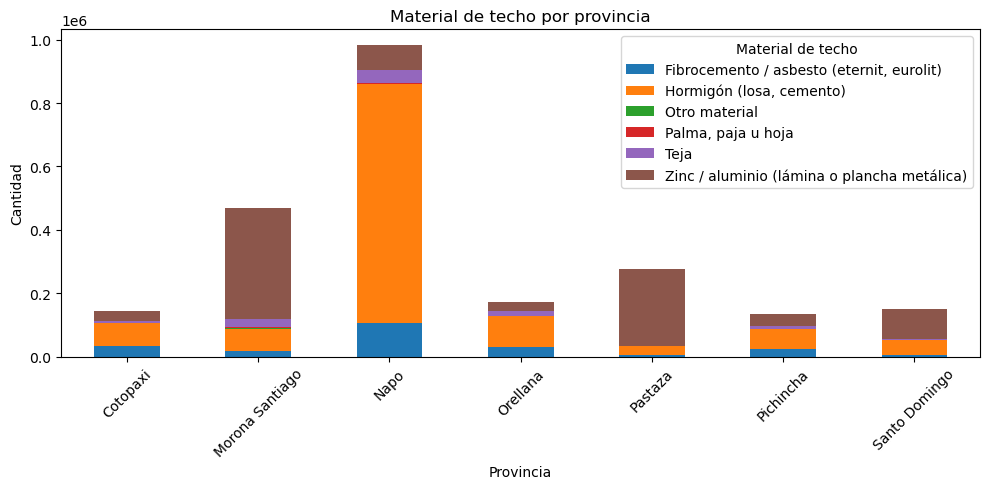

In [249]:
#We are going to explore the variables mat_techo, estado_techo, mat_paredes, estado_paredes, mat_piso, estado_piso
#We are going to identify the most vulnerable provinces in terms of housing materials
pivot_techo_por_provincia.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Material de techo por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.legend(title='Material de techo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Podemos ver que en la provincia de Pichincha la gran mayoría de las casas tiene piso de Hormigón, losa o cemento. 
Mientras tanto, en las provincias de Manabí, los Ríos y Santo Domingo de los Tsáchilas la mayoría de los techos son de zinc o aluminio. 

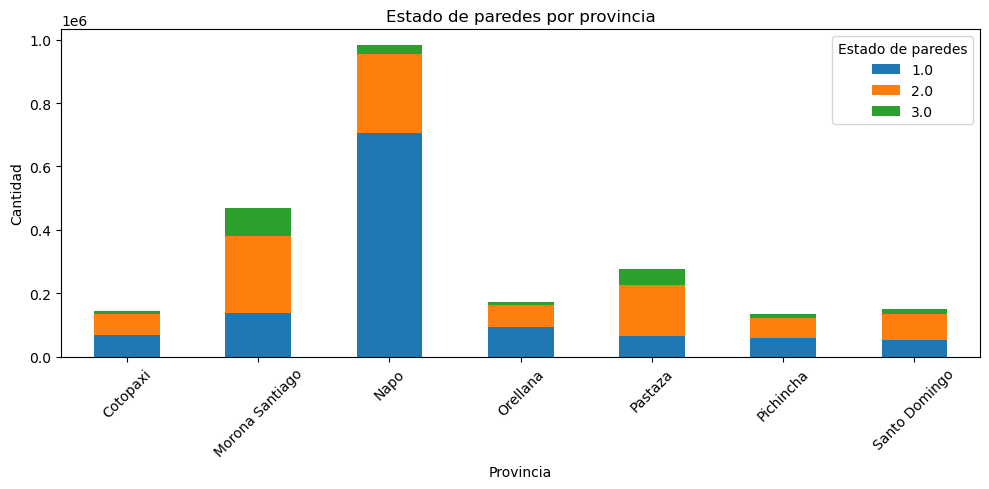

In [250]:
df_counts = df_renamed.groupby(['provincia', 'estado_paredes']).size().reset_index(name='cantidad_estado_paredes')
pivot_paredes_por_provincia = df_counts.pivot_table(
    index='provincia', 
    columns='estado_paredes', 
    values='cantidad_estado_paredes',
    aggfunc='sum'
).fillna(0)

pivot_paredes_por_provincia.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Estado de paredes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.legend(title='Estado de paredes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Del dataset sabemos que:
1. Bueno?
2. Regular?
3. Malo?
Vemos que la provincia de Pichincha tiene la mayoría de paredes exteriores en buna condición, sin embargo, en las provincias de Manabí y Los Ríos una gran cantidad tiene paredes en estado malo. 

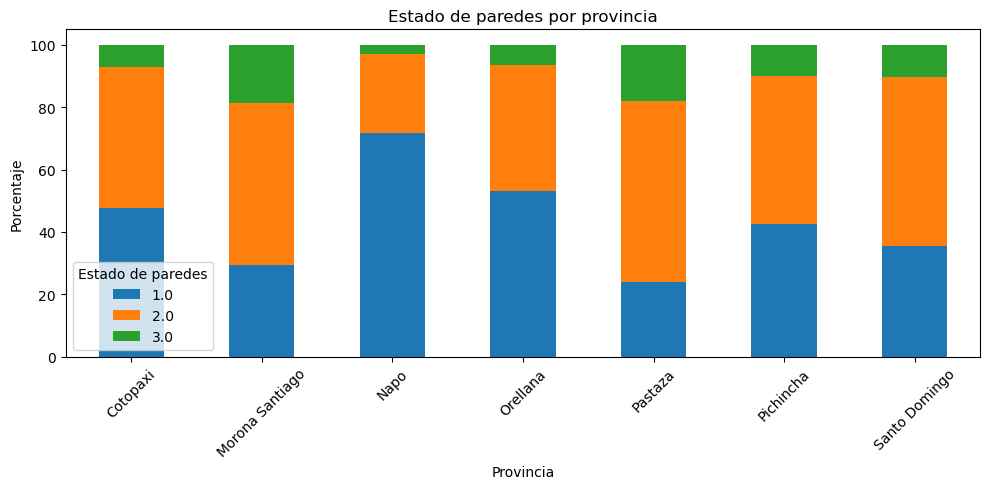

In [251]:
pivot_paredes_por_provincia_percent = pivot_paredes_por_provincia.div(pivot_paredes_por_provincia.sum(axis=1), axis=0) * 100

pivot_paredes_por_provincia_percent.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Estado de paredes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Porcentaje')
plt.legend(title='Estado de paredes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [252]:
#We try to see the percentage of null values in the dataset
null_percent = df_renamed.isnull().mean() * 100
null_percent_df = null_percent.reset_index()
null_percent_df.columns = ['Columnas', 'Porcentaje_Nulos']
null_percent_df = null_percent_df[null_percent_df['Porcentaje_Nulos'] > 0]
null_percent_df = null_percent_df.sort_values(by='Porcentaje_Nulos', ascending=False)
print(null_percent_df)

                Columnas  Porcentaje_Nulos
6        ocup_viv_colect         99.826560
16      electricidad_red         23.010249
32      mat_techo_labels         23.010249
30  deficit_habitacional         23.010249
29         nro_cuartos_r         23.010249
21           nro_hogares         23.010249
20      gasto_compartido         23.010249
19           nro_cuartos         23.010249
18    eliminacion_basura         23.010249
17      otra_fuente_elec         23.010249
33        mat_techo_desc         23.010249
15        tipo_sanitario         23.010249
14           fuente_agua         23.010249
13             tipo_agua         23.010249
12           estado_piso         23.010249
11              mat_piso         23.010249
10        estado_paredes         23.010249
9            mat_paredes         23.010249
8           estado_techo         23.010249
7              mat_techo         23.010249
28       ocup_viv_part_r          0.187180
5          ocup_viv_part          0.187180


In [253]:
#We want to know how many types of vivienda are in ocup_viv_part in percentages
ocup_viv_part_counts = df_renamed['ocup_viv_part'].value_counts(normalize = True) * 100
ocup_viv_part_counts = ocup_viv_part_counts.reset_index()
ocup_viv_part_counts.columns = ['Tipo de vivienda', 'Porcentaje']

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(ocup_viv_part_counts)


   Tipo de vivienda  Porcentaje
0               1.0   73.319971
1               4.0   11.844216
2               3.0    8.700363
3               2.0    3.814160
4               5.0    2.321290


In [254]:
#First we filter by desired types
desired_types = [1.0, 2.0, 3.0, 4.0]
filtered_by_vivienda_part = df_renamed[df_renamed['ocup_viv_part'].isin(desired_types)]
example_row = filtered_by_vivienda_part.groupby('ocup_viv_part').head(1)
print(example_row.T)

                                                               614520  \
provincia                                                   Pichincha   
canton_id                                                           1   
nro_vivienda                                                      1.0   
tipo_via                                                            1   
tipo_vivienda                                                Mediagua   
ocup_viv_part                                                     1.0   
ocup_viv_colect                                                   NaN   
mat_techo                                                         2.0   
estado_techo                                                      1.0   
mat_paredes                                                       2.0   
estado_paredes                                                    1.0   
mat_piso                                                          4.0   
estado_piso                                        

We can see that vivienda types number 3 and 4 which are (desocupadas or en construcción). This is important for replacing values in the next phase.

In [255]:

pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.width', None)         # no line wrapping
pd.set_option('display.max_colwidth', None)  # show full cell content

filtered_by_vivienda_01 = df_renamed[df_renamed['ocup_viv_part'] == 4.0] #Sabemos que 4.0 corresponde a viviendas en construcción

print(filtered_by_vivienda_01)

             provincia  canton_id  nro_vivienda  tipo_via  \
615829       Pichincha          1        1310.0         1   
615830       Pichincha          1        1311.0         1   
615832       Pichincha          1        1313.0         1   
615834       Pichincha          1        1315.0         7   
615837       Pichincha          1        1318.0         1   
...                ...        ...           ...       ...   
6466360  Santo Domingo          2       18899.0         1   
6466363  Santo Domingo          2       18902.0         1   
6466364  Santo Domingo          2       18903.0         1   
6466365  Santo Domingo          2       18904.0         1   
6466367  Santo Domingo          2       18906.0         7   

                 tipo_vivienda  ocup_viv_part  ocup_viv_colect  mat_techo  \
615829            Departamento            4.0              NaN        NaN   
615830              Casa/villa            4.0              NaN        NaN   
615832   Cuarto en inquilinato      

In [256]:

pd.set_option('display.max_columns', None)   # show all columns
pd.set_option('display.width', None)         # no line wrapping
pd.set_option('display.max_colwidth', None)  # show full cell content

filtered_by_vivienda_01 = df_renamed[df_renamed['ocup_viv_part'] == 3.0] #Sabemos que 4.0 corresponde a viviendas en construcción

print(filtered_by_vivienda_01)

             provincia  canton_id  nro_vivienda  tipo_via tipo_vivienda  \
614554       Pichincha          1          35.0         1    Casa/villa   
615828       Pichincha          1        1309.0         1  Departamento   
615831       Pichincha          1        1312.0         7    Casa/villa   
615833       Pichincha          1        1314.0         1      Mediagua   
615835       Pichincha          1        1316.0         1    Casa/villa   
...                ...        ...           ...       ...           ...   
6466354  Santo Domingo          2       18893.0         7    Casa/villa   
6466359  Santo Domingo          2       18898.0         7    Casa/villa   
6466361  Santo Domingo          2       18900.0         1    Casa/villa   
6466362  Santo Domingo          2       18901.0         6        Rancho   
6466366  Santo Domingo          2       18905.0         1    Casa/villa   

         ocup_viv_part  ocup_viv_colect  mat_techo  estado_techo  mat_paredes  \
614554            

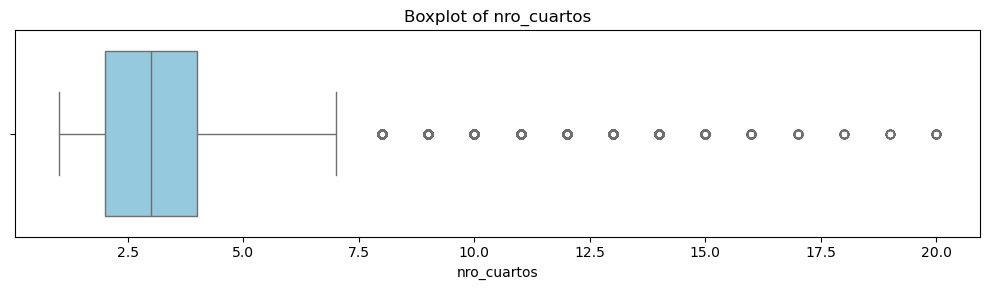

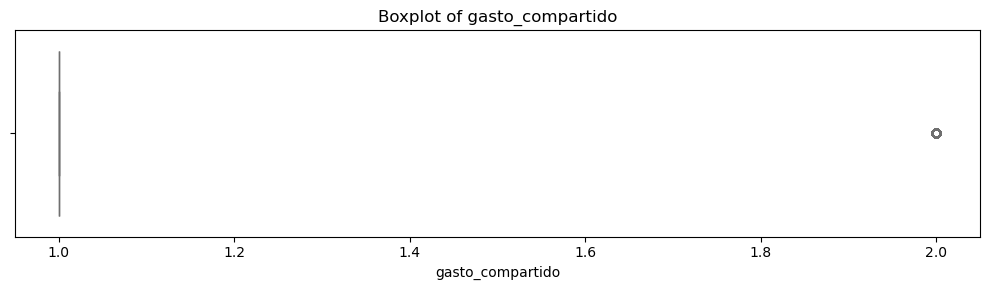

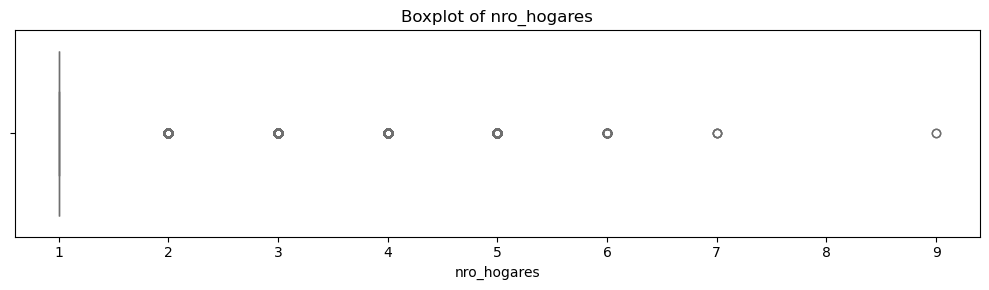

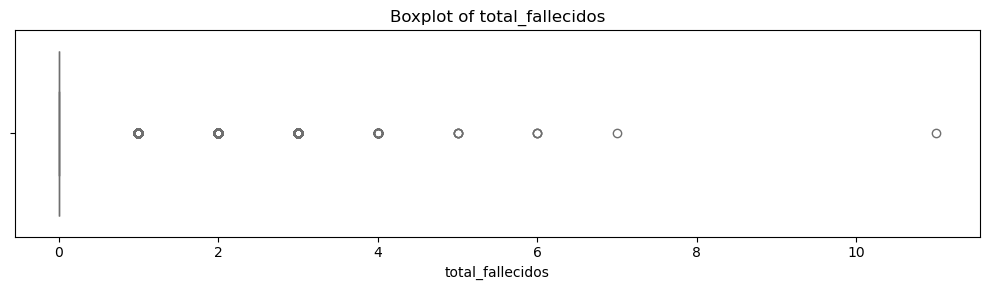

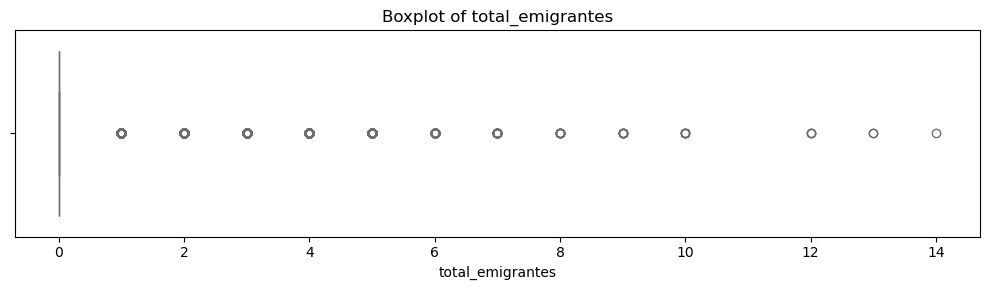

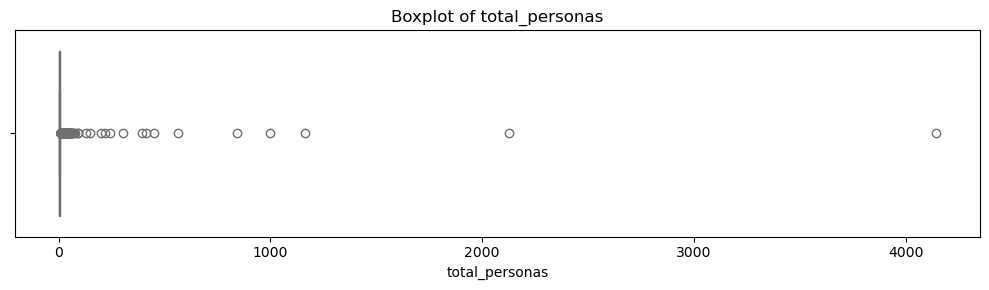

In [257]:
import seaborn as sns

#select numeric columns only
numeric_columns = ['nro_cuartos', 'gasto_compartido', 'nro_hogares', 'total_fallecidos', 'total_emigrantes', 'total_personas']

for col in numeric_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df_renamed[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_51374/1631836029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed, x='ocup_viv_part', y=col, palette='pastel')


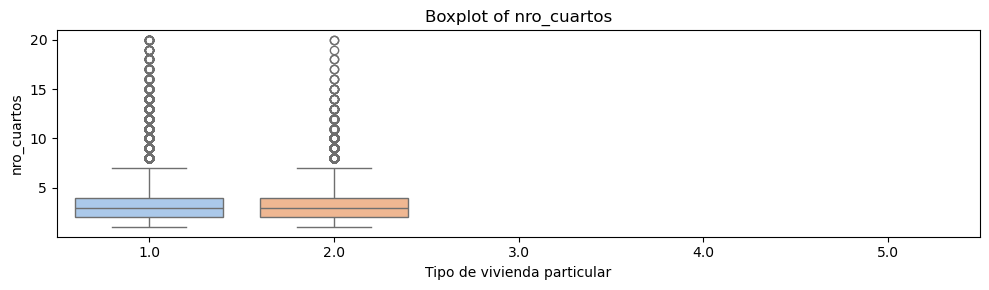

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_51374/1631836029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed, x='ocup_viv_part', y=col, palette='pastel')


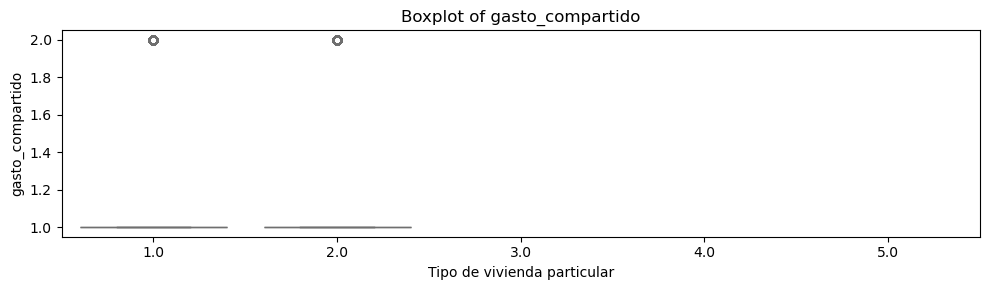

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_51374/1631836029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed, x='ocup_viv_part', y=col, palette='pastel')


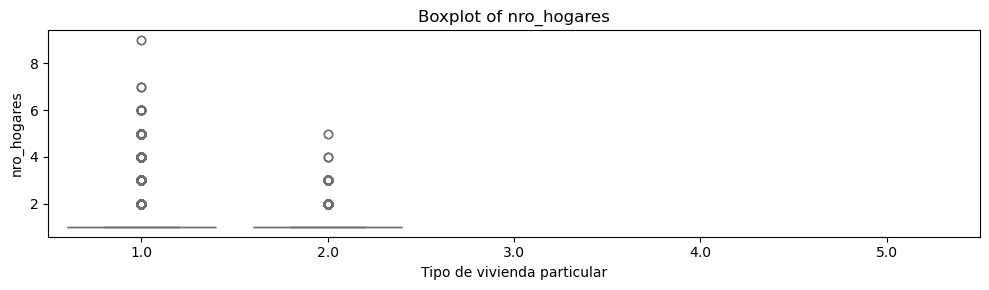

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_51374/1631836029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed, x='ocup_viv_part', y=col, palette='pastel')


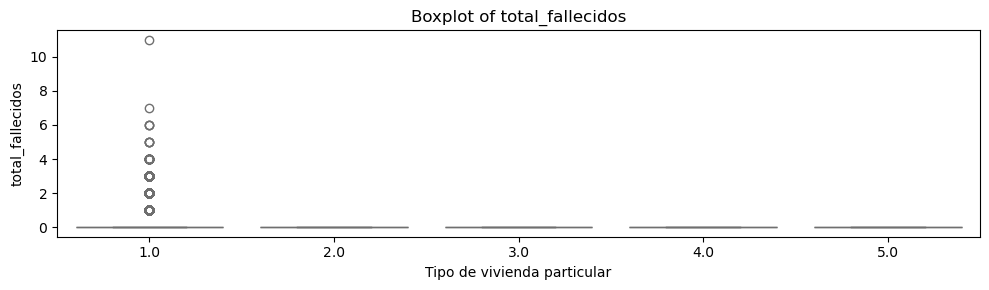

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_51374/1631836029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed, x='ocup_viv_part', y=col, palette='pastel')


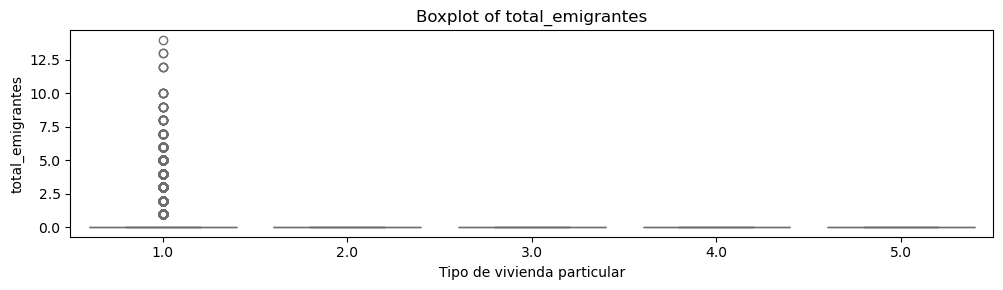

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_51374/1631836029.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed, x='ocup_viv_part', y=col, palette='pastel')


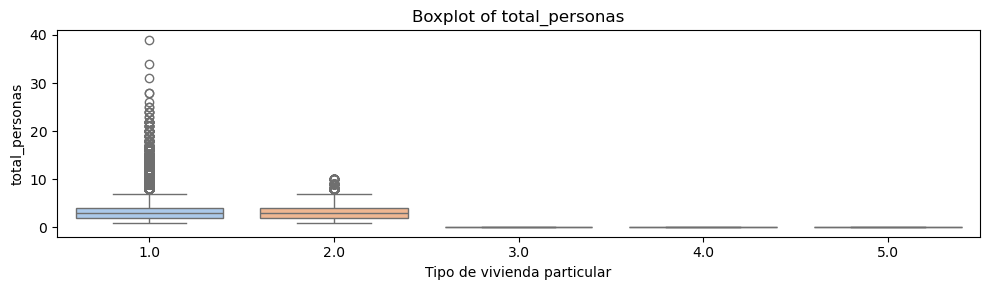

In [258]:
#Analizamos boxplots por tipo de vivienda: ocup_viv_part y ocup_viv_colect

#select numeric columns only
numeric_columns = ['nro_cuartos', 'gasto_compartido', 'nro_hogares', 'total_fallecidos', 'total_emigrantes', 'total_personas']

for col in numeric_columns:
    plt.figure(figsize=(10, 3))
    sns.boxplot(data=df_renamed, x='ocup_viv_part', y=col, palette='pastel')
    plt.title(f"Boxplot of {col}")
    plt.xlabel('Tipo de vivienda particular')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Not enough data to plot nro_cuartos by ocup_viv_colect.
Not enough data to plot gasto_compartido by ocup_viv_colect.
Not enough data to plot nro_hogares by ocup_viv_colect.


/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_51374/3739840481.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed, x='ocup_viv_colect', y=col, palette='pastel')


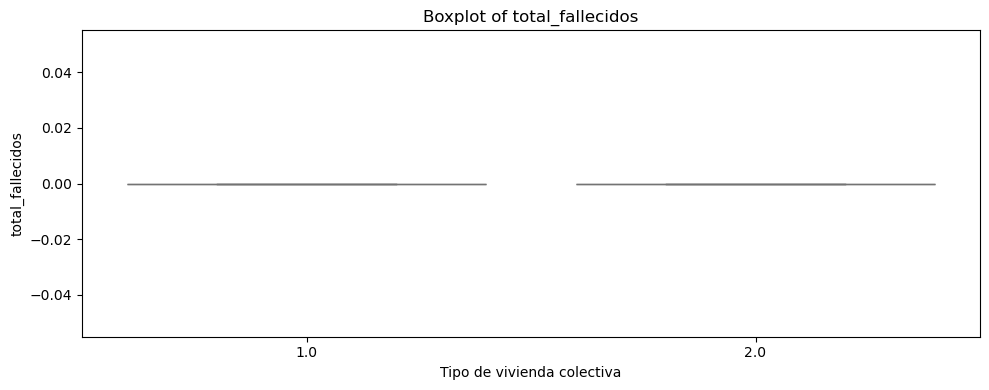

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_51374/3739840481.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed, x='ocup_viv_colect', y=col, palette='pastel')


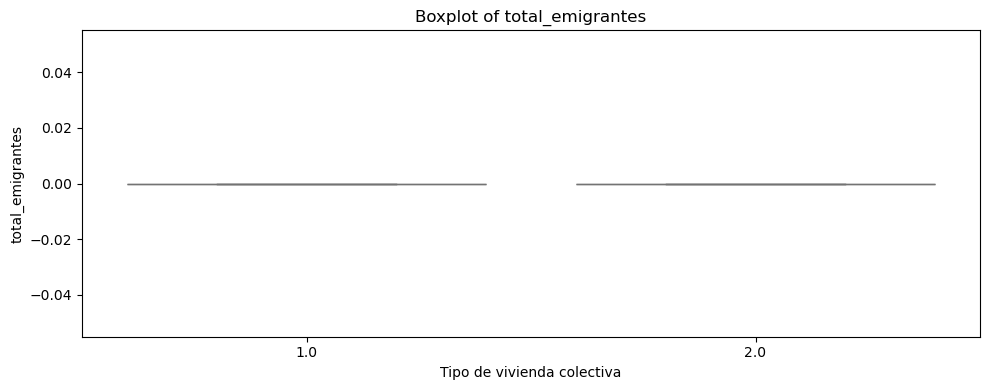

/var/folders/3l/l6t22czn1d11mnzrp1kdh_340000gn/T/ipykernel_51374/3739840481.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_renamed, x='ocup_viv_colect', y=col, palette='pastel')


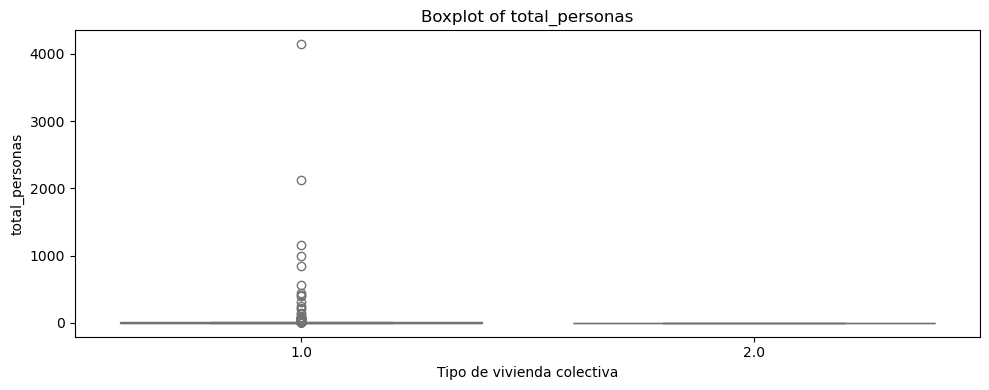

In [259]:
for col in numeric_columns:
    subset =df_renamed[['ocup_viv_colect', col]].dropna()

    # Check if there are enough unique values in 'ocup_viv_colect' to plot
    if subset.empty or subset['ocup_viv_colect'].nunique() < 1:
        print(f"Not enough data to plot {col} by ocup_viv_colect.")
        continue

    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df_renamed, x='ocup_viv_colect', y=col, palette='pastel')
    plt.title(f"Boxplot of {col}")
    plt.xlabel('Tipo de vivienda colectiva')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

Podemos confirmar que las viviendas tipo 3 y 4 son las que no tienen valores que corresponden a los tipos de materiales de construcción.
Pasos propuestos:
1. Borrar los datos de viviendas desocupadas o en construcción, porque no contribuirían a los índices de vulnerabilidad por estar inhabitadas. (Confirmar con artículos)
2. Si estas columnas todavía tienen valores nulos lo más probable es que se impute for Nearest Neighbours

Gracias a los boxplot podemos confirmar que las viviendas particulares y colectivas tienen outliers, asi que la presencia de outliers en la evaluación inicial (que no separaba por vivienda) no se debe a las viviendas colectivas que podrían tener más personas o más cuartos por su misma naturaleza. 

In [260]:
conn = sqlite3.connect('/Users/dicordova/Proyecto-FDS/data/nueva_base.db')

df_renamed.to_sql('df_renamed_vivienda', conn, if_exists='replace', index=False)

conn.close()

